In [2]:
#================================================
#                       INFO
#  Este script construye la grafica historica del 
# tamaño de bloques en Bitcoin. Para lo cual se toman
# datos de un archivo `.npy`.      
# 
#================================================

#===========================
# Librerias
#===========================
import os,sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
import matplotlib.image as mpimg
from matplotlib import font_manager as fm, rcParams
import matplotlib.ticker as ticker
from matplotlib.animation import FuncAnimation

from datetime import datetime, timedelta
import locale
locale.setlocale(locale.LC_TIME, 'es')



#===========================
# Configurando grafica 
#===========================

# Tipografia
fpath = os.path.join(r'bins/MonoLisaSimpson-Regular.ttf')
prop = fm.FontProperties(fname=fpath)
fname = os.path.split(fpath)[1]

# Tabla de colores 
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
   (44, 44, 44), (255, 255, 248), (255, 255, 255), (255, 152, 150),  
   (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
   (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
   (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)] 

# conversion a rgb
for i in range(len(tableau20)):    
   r, g, b = tableau20[i]    
   tableau20[i] = (r / 255., g / 255., b / 255.)   



#===========================
# Procesamiento de Datos
#===========================

# Cargamos los datos a usar como arrays
aux         =  np.load('bins/database.npz', allow_pickle='TRUE') 
n_block     =  aux['n_block']
time_b        =  aux['time_b']
size        =  aux['size']
strippedsize = aux['strippedsize']
weight = aux['weight']
total_btc = aux['total']

# Las fechas tienen un tratamiento especial.
# la mejor forma de hacerlo es pasarlos como objetos
# que matplot interpreta luego como fechas.

time_b = pd.to_datetime(time_b) 
#time_b es un array con fechas en str

#las convertimos a datetime y solo guardamos la fecha (no la hora)
time_b = time_b.date

# un nuevo array contendra los valores para q matplotlib maneje fechas.
# estos valores son números. 
num_dates = mdates.date2num(time_b)



# Los bloques salen en promedio cada 10 min a partir del primer bloque 
# cada uno tiene un timestamp con fecha y hora en time_b 
# y solo la fecha en num_dates (en formato timeframe).

n_block=n_block[::1008*12]
num_dates=num_dates[::1008*12]
# se dividen enter mil para mostrar el dato en KB
size=size[::1008*12]/1000
strippedsize=strippedsize[::1008*12]/1000

len(num_dates)

65

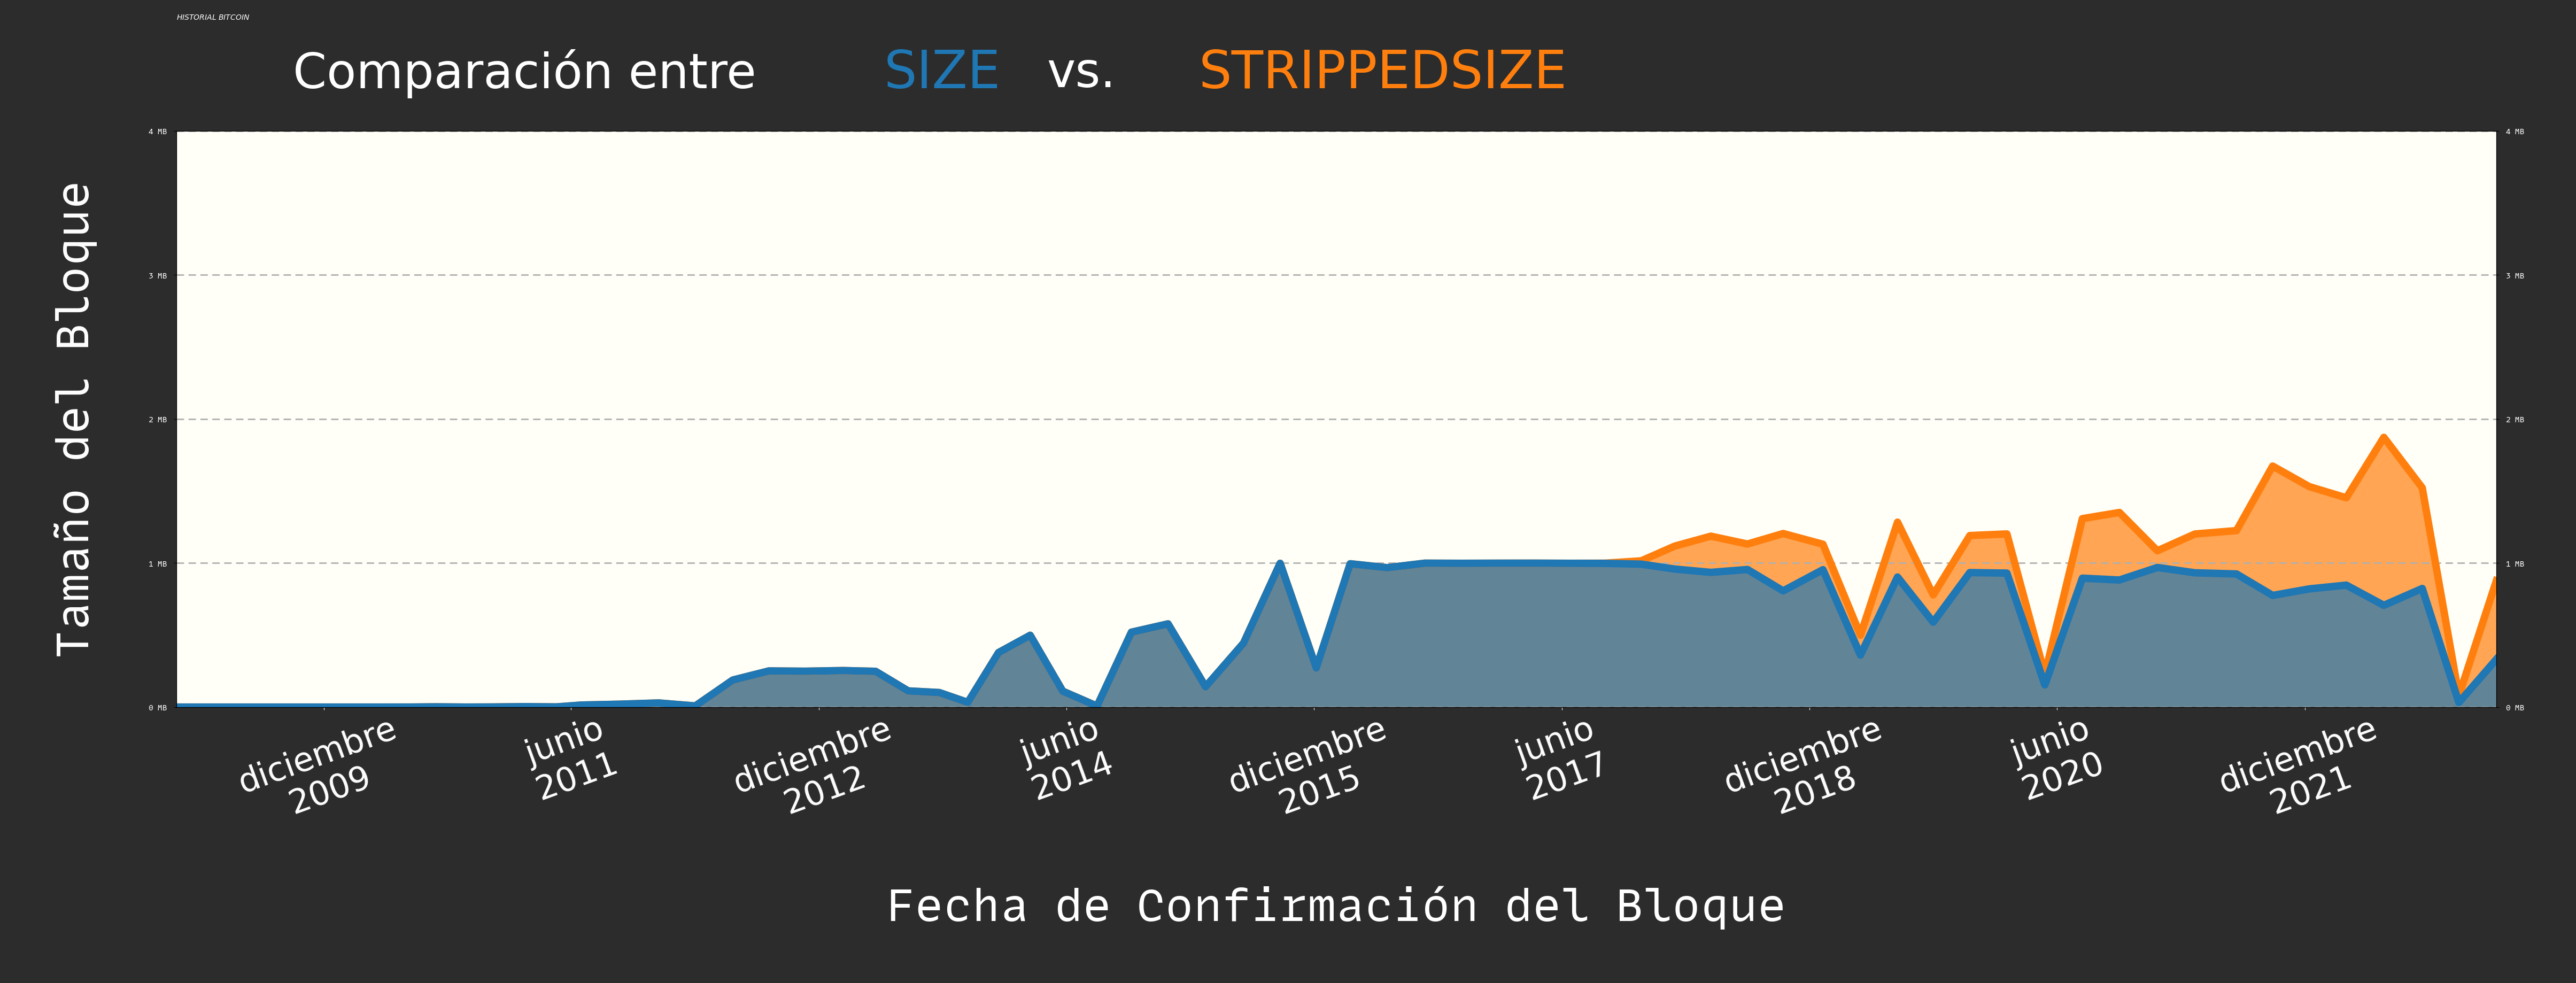

In [3]:
fig, ax = plt.subplots(figsize=(56, 14))

#Color del fondo
fig.patch.set_facecolor(tableau20[4])
plt.axes().patch.set_facecolor(tableau20[5])

plt.title('\n'+r"$\bf{\it{HISTORIAL\ BITCOIN\ }}$",fontsize=150,color=tableau20[6],fontproperties=prop,pad=150,loc='left')

ax.set_title('')
title_pos = ax.title.get_position()
ax.text(title_pos[0]-0.35,title_pos[1]+0.1, 'Comparación entre', ha='center', va='center', transform=ax.transAxes,fontsize=65,color=tableau20[6])
ax.text(title_pos[0]-0.17,title_pos[1]+0.1, 'SIZE', ha='center', va='center', transform=ax.transAxes,fontsize=70,color=tableau20[0])
ax.text(title_pos[0]-0.11,title_pos[1]+0.1, 'vs.', ha='center', va='center', transform=ax.transAxes,fontsize=65,color=tableau20[6])
ax.text(title_pos[0]+0.02,title_pos[1]+0.1, 'STRIPPEDSIZE', ha='center', va='center', transform=ax.transAxes,fontsize=70,color=tableau20[2])


# se plantea hacer un gif para mostrarlo animado

#line, = plt.plot_date(n_block, size,"--", color=tableau20[2],linewidth=0.3)

plt.plot_date(num_dates, size,"-", color=tableau20[2],linewidth=10)
plt.fill_between(num_dates, size, facecolor =tableau20[2], alpha = 0.7, label='Size')

plt.plot_date(num_dates, strippedsize,"-", color=tableau20[0],linewidth=10)
plt.fill_between(num_dates, strippedsize, facecolor =tableau20[0], alpha = 0.7, label='StrippedSize')
   

plt.xlabel('\nFecha de Confirmación del Bloque\n',fontsize=60,fontproperties=prop,color=tableau20[6])
plt.ylabel('\nTamaño del Bloque\n',fontsize=60,fontproperties=prop,color=tableau20[6])
plt.gca().yaxis.grid(linestyle='-',linewidth=2,dashes=(5,3))
plt.xlim(num_dates[0],num_dates[-1])
plt.ylim(0,1.2*max(size))
ytick_labels = ['0 MB ','1 MB ','2 MB ','3 MB ','4 MB ']
plt.yticks([0, 1000, 2000, 3000, 4000],ytick_labels,fontsize=50,fontproperties=prop,color=tableau20[6]);
ax.set_yticks([], [])
ax.set_xticks([], [])

locator = mdates.MonthLocator(interval=18)
formatter = mdates.DateFormatter('%B\n%Y')
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().xaxis.set_tick_params(labelsize=45,rotation=20)
plt.tick_params(axis='x', colors=tableau20[6])

# Establecer límites del segundo eje Y

ax2 = ax.twinx()
ax2.set_ylim(0,1.2*max(size))
ax2.set_yticks([0, 1000, 2000, 3000, 4000])
ytick_labels = [' 0 MB',' 1 MB',' 2 MB',' 3 MB',' 4 MB']
ax2.set_yticklabels(ytick_labels, fontsize=50, fontproperties=prop, color=tableau20[6])
ax2.set_ylabel(' \n',fontsize=30,fontproperties=prop,color=tableau20[6])




plt.savefig('pics/blocksize.png',bbox_inches='tight')

In [4]:
fig, ax = plt.subplots(figsize=(56, 14),dpi=300)


#Color del fondo
fig.patch.set_facecolor(tableau20[4])
plt.axes().patch.set_facecolor(tableau20[5])


plt.title('\n'+r"$\bf{\it{HISTORIAL\ BITCOIN\ }}$",fontsize=150,color=tableau20[6],fontproperties=prop,pad=150,loc='left')

ax.set_title('')
title_pos = ax.title.get_position()
ax.text(title_pos[0]-0.35,title_pos[1]+0.1, 'Comparación entre', ha='center', va='center', transform=ax.transAxes,fontsize=65,color=tableau20[6])
ax.text(title_pos[0]-0.17,title_pos[1]+0.1, 'SIZE', ha='center', va='center', transform=ax.transAxes,fontsize=70,color=tableau20[0])
ax.text(title_pos[0]-0.11,title_pos[1]+0.1, 'vs.', ha='center', va='center', transform=ax.transAxes,fontsize=65,color=tableau20[6])
ax.text(title_pos[0]+0.02,title_pos[1]+0.1, 'STRIPPEDSIZE', ha='center', va='center', transform=ax.transAxes,fontsize=70,color=tableau20[2])

plt.xlabel('\nFecha de Confirmación del Bloque\n',fontsize=60,fontproperties=prop,color=tableau20[6])
plt.ylabel('\nTamaño del Bloque\n',fontsize=60,fontproperties=prop,color=tableau20[6])
plt.gca().yaxis.grid(linestyle='-',linewidth=2,dashes=(5,3))
plt.xlim(num_dates[0],num_dates[-1])
plt.ylim(0,2*max(size))
ytick_labels = ['0 MB ','1 MB ','2 MB ','3 MB ','4 MB ']
plt.yticks([0, 1000, 2000, 3000, 4000],ytick_labels,fontsize=50,fontproperties=prop,color=tableau20[6]);
ax.set_yticks([], [])
ax.set_xticks([], [])

locator = mdates.MonthLocator(interval=18)
formatter = mdates.DateFormatter('%B\n%Y')
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().xaxis.set_tick_params(labelsize=45,rotation=20)
plt.tick_params(axis='x', colors=tableau20[6])

# Establecer límites del segundo eje Y
ax2 = ax.twinx()
ax2.set_ylim(0, 2*max(size))
ax2.set_yticks([0, 1000, 2000, 3000, 4000])
ytick_labels = [' 0 MB',' 1 MB',' 2 MB',' 3 MB',' 4 MB']
ax2.set_yticklabels(ytick_labels, fontsize=50, fontproperties=prop, color=tableau20[6])
ax2.set_ylabel(' \n',fontsize=30,fontproperties=prop,color=tableau20[6])


#la parte animada
line1, = plt.plot_date(num_dates, size,"-", color=tableau20[2],linewidth=10)
line2, = plt.plot_date(num_dates, strippedsize,"-", color=tableau20[0],linewidth=10)

aux_txt =   plt.text(num_dates[1], 2000, ' ', fontsize=100, color='red', ha='center', va='center')

def update(i):
    global aux_txt
    # Actualizar los datos de la línea
    line1.set_data(num_dates[:i], size[:i])
    line2.set_data(num_dates[:i], strippedsize[:i])
    # Agregar texto en el marco 10-40

    if i > 4:
        try:
            aux_txt.remove()
        except:
            pass

    if i >= 4 and i <= 24:
        aux_txt = plt.text(num_dates[1], 2000, 'hola', fontsize=100, color='red', ha='center', va='center')

    return line1,line2

ani = FuncAnimation(fig,update, frames=len(num_dates), interval=50, blit=True)

ani.save('a_b.gif', writer='imagemagick',dpi = "figure")
plt.show()  # Show for testing

In [ ]:
# chainwork es una medida de dificultad acumulada.
# mide cuánto trabajo se ha realizado en una cadena 
# de bloques 

# el valor chainwork es el número total de intentos 
# de hash necesarios para producir todos los 
# bloques 

temp = []

for a in chainwork:
   b = int(a, 16)
   temp.append(b) #para ponerlo en escala exa

cw_dec = np.array(temp)


In [ ]:
import math

def bits_to_difficulty(bits):
   bits = int(bits, 16)
   # Convertir bits a un número de 256 bits en formato big-endian
   target = (bits & 0x007fffff) * 2 ** (8 * ((bits >> 24) - 3)) 
   # Calcular la dificultad como el cociente entre el objetivo máximo y el objetivo actual
   max_target = 0xffff * 2 ** (8 * (0x1d - 3))
   difficulty = max_target / target
   return difficulty

dif_btc1 = []
for a in bits:
   v = bits_to_difficulty(a)
   dif_btc1.append(v)

dif_btc = np.array(dif_btc1)


NameError: name 'bits' is not defined

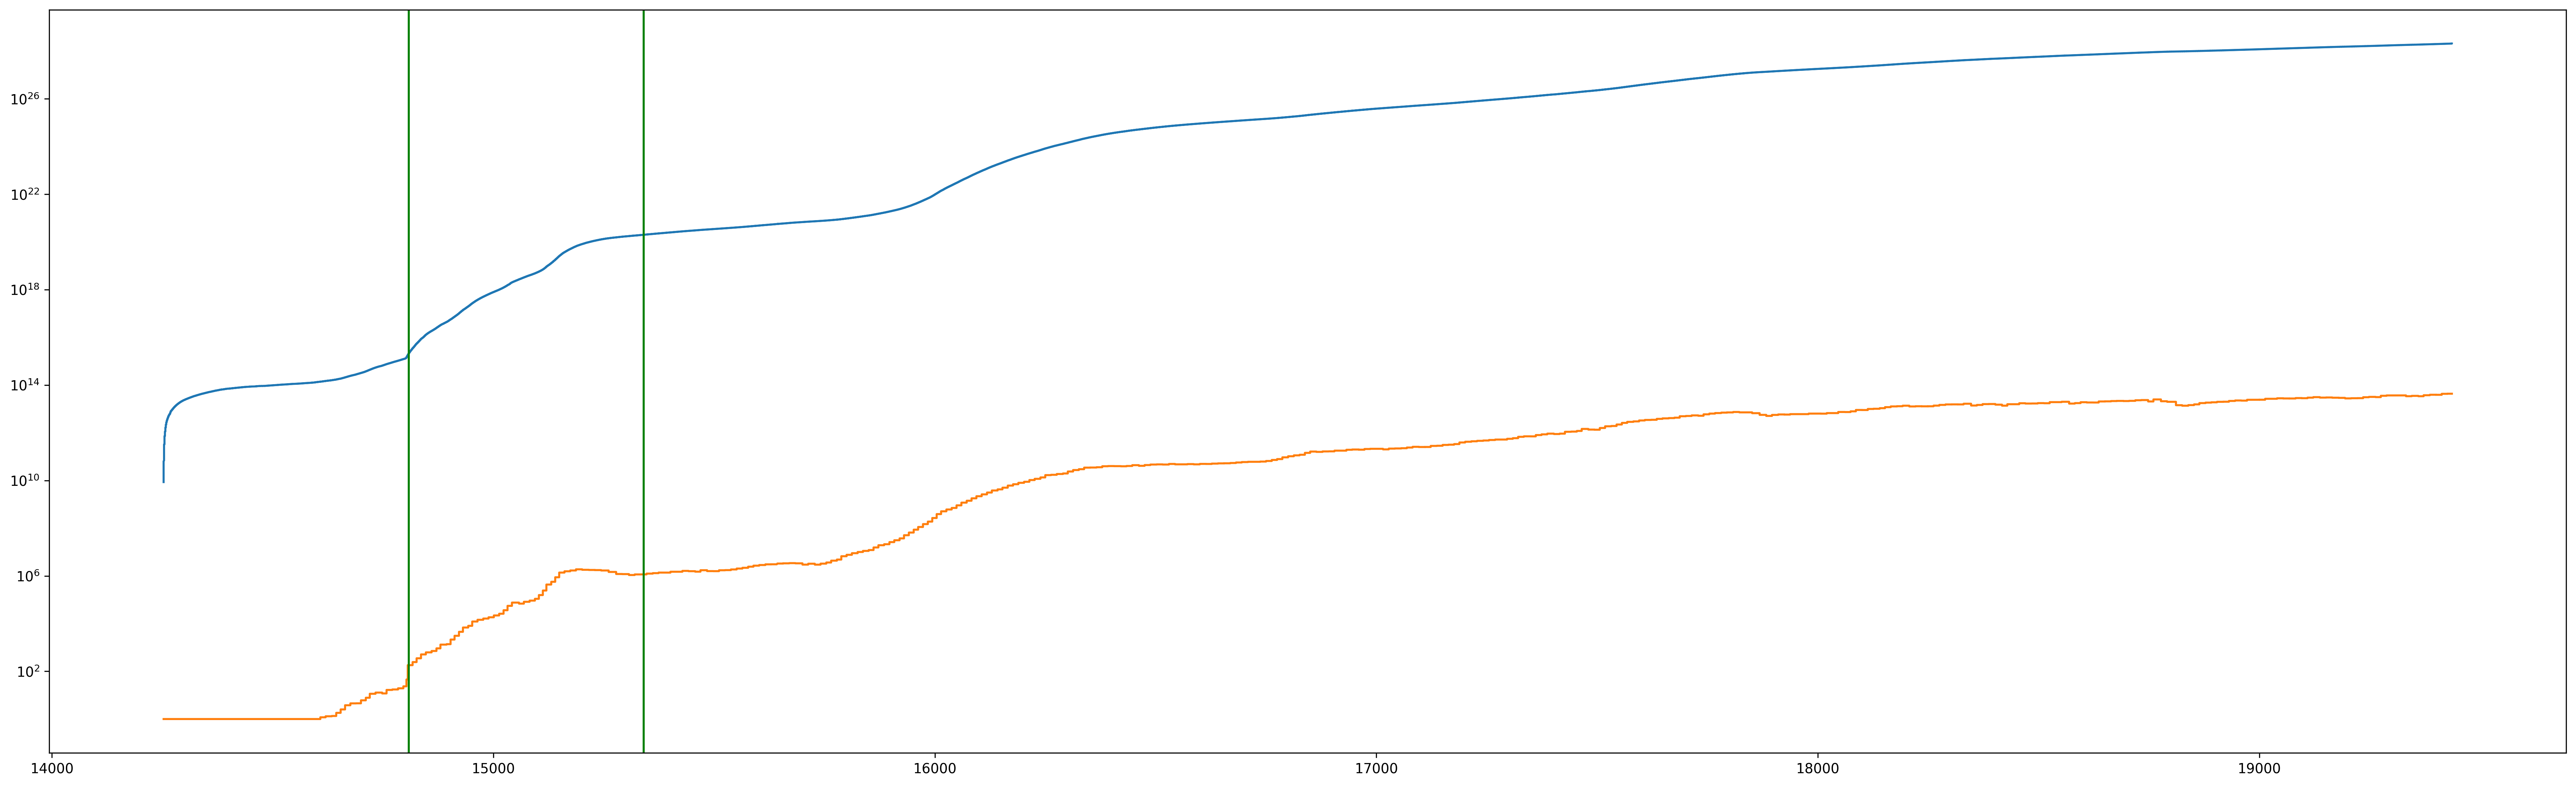

In [ ]:
fig, ax = plt.subplots(figsize=(33,10),dpi=300)

plt.plot(num_dates,cw_dec)
plt.plot(num_dates,dif_btc)
plt.yscale('log')
#plt.xscale('log')

date_min = datetime(2010, 7, 18)
# Convertir la fecha a valor numérico en formato de número de días desde el inicio de la fecha
date_min_num = (date_min - datetime(1970, 1, 1)).total_seconds() / (24 * 60 * 60)
plt.axvline(date_min_num, color="g", label="Min") # Agregar línea vertical en la fecha especificada

date_min1 = datetime(2012, 1, 1)
# Convertir la fecha a valor numérico en formato de número de días desde el inicio de la fecha
date_min_num1 = (date_min1 - datetime(1970, 1, 1)).total_seconds() / (24 * 60 * 60)
plt.axvline(date_min_num1, color="g", label="Min") # Agregar línea vertical en la fecha especificada



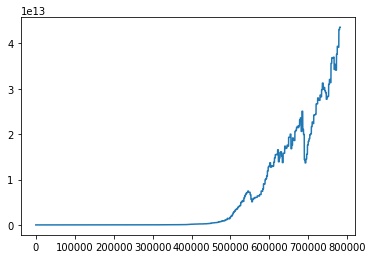

In [ ]:
plt.plot(n_block,dif_btc)

In [92]:
"""    INFO
Para calcular cuanto bitcoin será emitido con precisión
usamos la regla:
-Recompensa Inicial > 50 btc
-Cada 210 000 bloques se reduce a la mitad
-La mínima unidad es satoshi 1 btc = 100 000 000 sats
la recompensa inicial son 50*10^8 sats (50 btc)
"""

# librerias a usar
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.image as mpimg
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox

PRIZE = 50*10**8  # premio inicial

# un halv ocurre cada 210 000 bloques
LIM = 210_000  # limite de division
BTC = 0  # se inicia con cero bitcoin
HALV = 0  # contador de halvings
BLOCKS = 0  # contador de bloques
DATE = datetime(2009, 1, 3, 18, 15)  # fecha inicio Bloques

# los datos se almacenan en una lista
H = [0,]  # Halv
Y = [0,]  # btc emitido
YN = []  # normalizado


H_D = [DATE,]  # halv date estimated

#para detalles de la grafica mas precisos

A = [0,]    # graf por bloque
B = [DATE,] # graf por bloque


while PRIZE > 0:
    aux = [(BTC := BTC+PRIZE, BLOCKS := BLOCKS+1,A.append(BTC),B.append(B[-1]+timedelta(minutes=10))) for i in range(0, LIM)]
    print('Halv:',HALV, end='|')
    print('Prize(sats):',PRIZE/10**8,end='|')
    print('Supply(btc):',BTC/10**8,end='|')
    print('Block:',BLOCKS,end='|')
    print('Date:'+(H_D[-1]+timedelta(minutes=10*LIM)).strftime('%Y (estimate)'))
    PRIZE //= 2
    HALV += 1
    H.append(HALV)
    H_D.append(H_D[-1]+timedelta(minutes=10*LIM))
    Y.append(BTC)

# Correccion de fechas: La fecha del Halv es estimada pues
# se calcula tomando el promedio de salida de bloque 10 min
# por la cantidad de bloques 210 000 en cada halving
# Se toman las fechas reales en vez del dato estimado. 
H_D[1] = datetime(2012, 11, 28)
H_D[2] = datetime(2016, 7, 9)
H_D[3] = datetime(2020, 5 ,11)
YN = [(100*a/10**8)/(BTC/10**8) for a in Y]
A1 = [(100*a/10**8)/(BTC/10**8) for a in A]
B1 = [b.date() for b in B]
# Creamos la imagen

# Tabla de colores
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),
             (44, 44, 44), (255, 255, 248), (255, 255, 255), (255, 152, 150),
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]

for i, color in enumerate(tableau20):
    r, g, b = color
    tableau20[i] = (r / 255., g / 255., b / 255.)




Halv: 0|Prize(sats): 50.0|Supply(btc): 10500000.0|Block: 210000|Date:2013 (estimate)
Halv: 1|Prize(sats): 25.0|Supply(btc): 15750000.0|Block: 420000|Date:2016 (estimate)
Halv: 2|Prize(sats): 12.5|Supply(btc): 18375000.0|Block: 630000|Date:2020 (estimate)
Halv: 3|Prize(sats): 6.25|Supply(btc): 19687500.0|Block: 840000|Date:2024 (estimate)
Halv: 4|Prize(sats): 3.125|Supply(btc): 20343750.0|Block: 1050000|Date:2028 (estimate)
Halv: 5|Prize(sats): 1.5625|Supply(btc): 20671875.0|Block: 1260000|Date:2032 (estimate)
Halv: 6|Prize(sats): 0.78125|Supply(btc): 20835937.5|Block: 1470000|Date:2036 (estimate)
Halv: 7|Prize(sats): 0.390625|Supply(btc): 20917968.75|Block: 1680000|Date:2040 (estimate)
Halv: 8|Prize(sats): 0.1953125|Supply(btc): 20958984.375|Block: 1890000|Date:2044 (estimate)
Halv: 9|Prize(sats): 0.09765625|Supply(btc): 20979492.1875|Block: 2100000|Date:2048 (estimate)
Halv: 10|Prize(sats): 0.04882812|Supply(btc): 20989746.0927|Block: 2310000|Date:2052 (estimate)
Halv: 11|Prize(sats):

In [93]:
B1

[datetime.date(2009, 1, 3),
 datetime.date(2009, 1, 3),
 datetime.date(2009, 1, 3),
 datetime.date(2009, 1, 3),
 datetime.date(2009, 1, 3),
 datetime.date(2009, 1, 3),
 datetime.date(2009, 1, 3),
 datetime.date(2009, 1, 3),
 datetime.date(2009, 1, 3),
 datetime.date(2009, 1, 3),
 datetime.date(2009, 1, 3),
 datetime.date(2009, 1, 3),
 datetime.date(2009, 1, 3),
 datetime.date(2009, 1, 3),
 datetime.date(2009, 1, 3),
 datetime.date(2009, 1, 3),
 datetime.date(2009, 1, 3),
 datetime.date(2009, 1, 3),
 datetime.date(2009, 1, 3),
 datetime.date(2009, 1, 3),
 datetime.date(2009, 1, 3),
 datetime.date(2009, 1, 3),
 datetime.date(2009, 1, 3),
 datetime.date(2009, 1, 3),
 datetime.date(2009, 1, 3),
 datetime.date(2009, 1, 3),
 datetime.date(2009, 1, 3),
 datetime.date(2009, 1, 3),
 datetime.date(2009, 1, 3),
 datetime.date(2009, 1, 3),
 datetime.date(2009, 1, 3),
 datetime.date(2009, 1, 3),
 datetime.date(2009, 1, 3),
 datetime.date(2009, 1, 3),
 datetime.date(2009, 1, 3),
 datetime.date(2009,

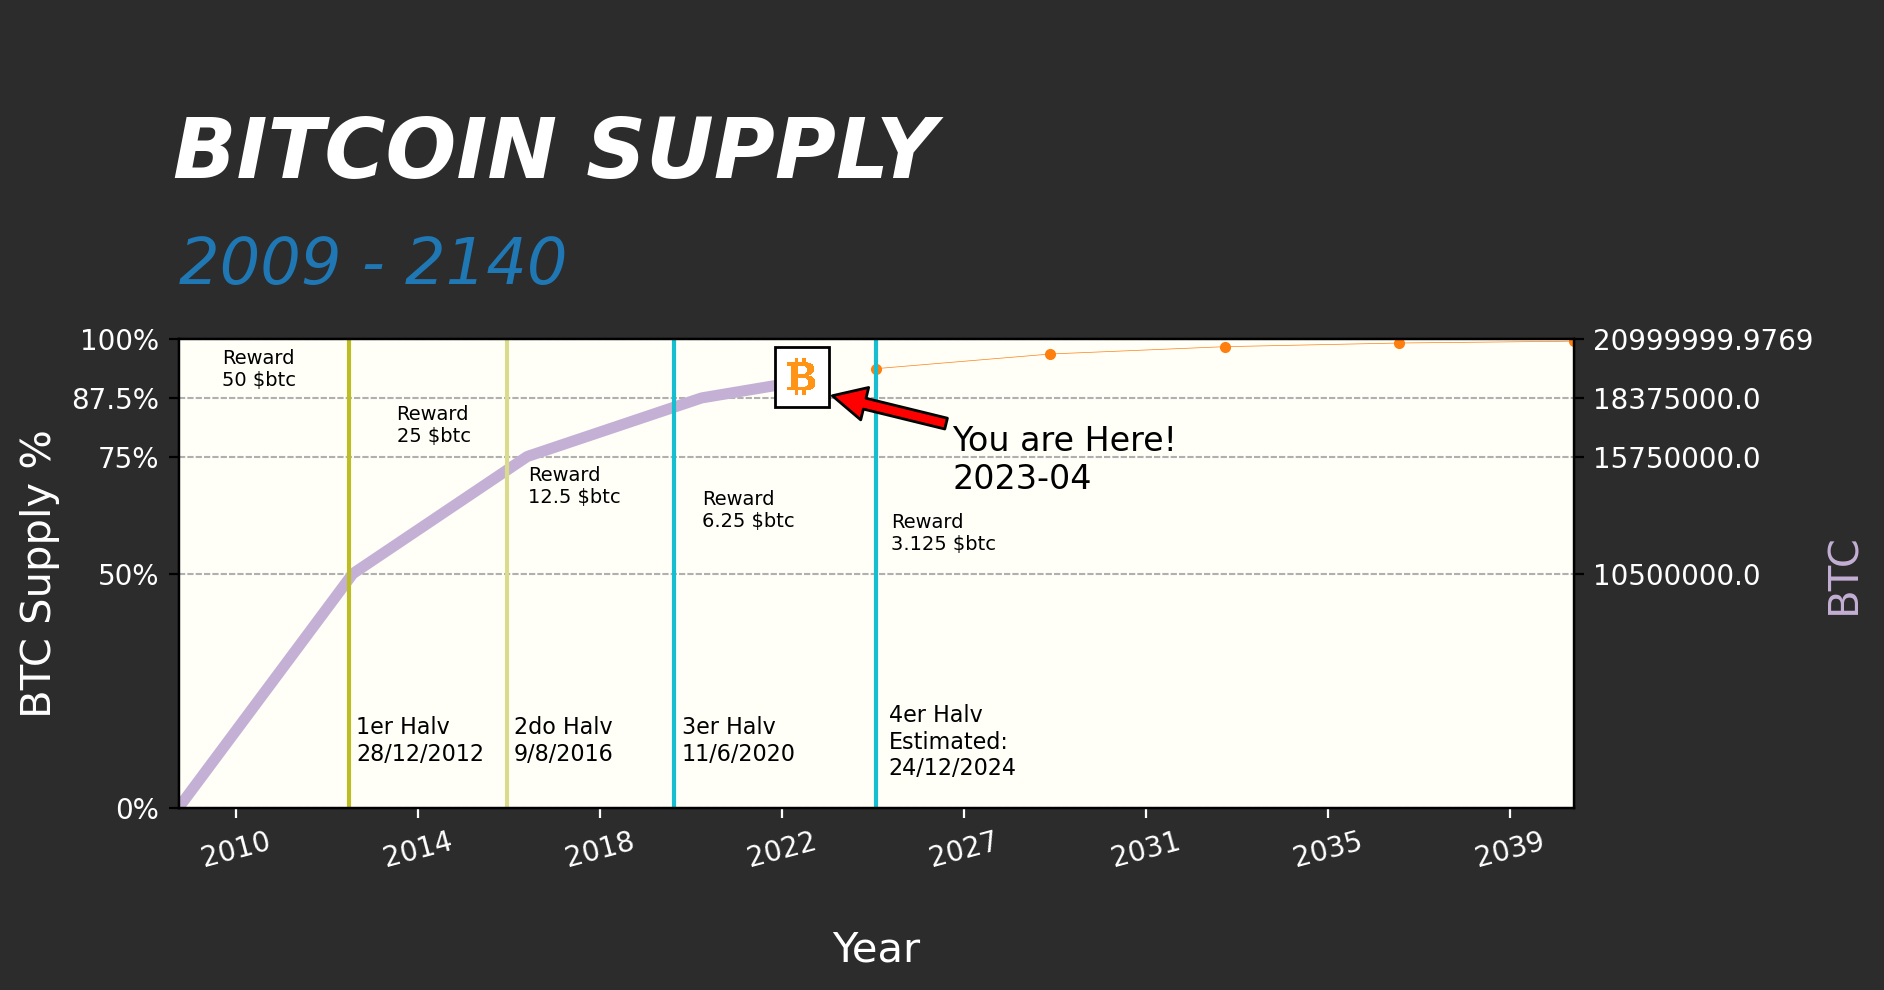

In [168]:

# Creamos la imagen y su fondo
fig, ax = plt.subplots(figsize=(10, 5),dpi=200)
fig.patch.set_facecolor(tableau20[4])
plt.axes().patch.set_facecolor(tableau20[5])


plt.title("2009 - 2140 ", fontsize=23,
           color=tableau20[0], loc='left', fontweight='light', fontstyle='italic',pad=20)
plt.suptitle("\nBITCOIN SUPPLY", fontsize=30, color=tableau20[6], fontweight='heavy', fontstyle='oblique',x=0.33)
plt.ylabel('BTC Supply %', fontsize=15,
           color=tableau20[6])
plt.xlabel('\nYear', fontsize=15,
           color=tableau20[6])

plt.gca().yaxis.grid(linestyle='-', linewidth=0.75, dashes=(3, 1))

plt.xlim(H_D[0], H_D[8])
plt.ylim(0, 100)
ax.set_yticks([], [])
ax.set_xticks([], [])


btc = mpimg.imread('pics/btc.png')
imagebox = OffsetImage(btc,zoom=0.01)
hoy =  datetime.now()
firma = AnnotationBbox(imagebox,(hoy,92))
plt.gca().add_artist(firma)

hoy_txt = hoy.date().strftime('%Y-%m')

plt.annotate('You are Here!\n'+hoy_txt, xy=(hoy.date()+timedelta(weeks=36),88),xytext=(hoy.date()+timedelta(weeks=180),68),fontsize=12,color='black',arrowprops=dict(facecolor='red', shrink=0.005))


plt.plot_date(H_D[4:], YN[4:], "-",
              color=tableau20[2], linewidth=0.25)
plt.plot_date(H_D[4:], YN[4:], ".",
              color=tableau20[2], markersize =6)
index = B1.index(hoy.date())

plt.plot_date(B1[:index:2016],A1[:index:2016],'-',
              color=tableau20[9], linewidth=4)

locator = mdates.MonthLocator(interval=50)
formatter = mdates.DateFormatter('%Y')
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().xaxis.set_tick_params(labelsize=10,rotation=15)
plt.tick_params(axis='x', colors=tableau20[6])

ytick_labels = ['0%','50%','75%','87.5%','100%']
plt.yticks([0, 50, 75, 87.5, 100],ytick_labels,fontsize=10,color=tableau20[6]);




plt.axvline(datetime(2012, 11, 28), color=tableau20[16])
plt.text(datetime(2013, 1, 28),10,'1er Halv\n28/12/2012',fontsize=8)

plt.axvline(datetime(2016, 7, 9), color=tableau20[17])
plt.text(datetime(2016, 9, 9),10,'2do Halv\n9/8/2016',fontsize=8)

plt.axvline(datetime(2020, 5, 11), color=tableau20[18])
plt.text(datetime(2020, 7, 11),10,'3er Halv\n11/6/2020',fontsize=8)

plt.axvline(H_D[4], color=tableau20[18])
plt.text(H_D[4]+timedelta(weeks=15),7,'4er Halv\nEstimated:\n24/12/2024',fontsize=8)

plt.text(datetime(2010,1,1),90,'Reward\n50 $btc',fontsize=7)
plt.text(datetime(2014,1,1),78,'Reward\n25 $btc',fontsize=7)
plt.text(datetime(2017,1,1),65,'Reward\n12.5 $btc',fontsize=7)
plt.text(datetime(2021,1,1),60,'Reward\n6.25 $btc',fontsize=7)
plt.text(datetime(2025,5,1),55,'Reward\n3.125 $btc',fontsize=7)



ax2 = ax.twinx()

# Establecer límites del segundo eje Y
ax2.set_yticks([50, 75, 87.5, 100])
ytick_labels = ['10500000.0','15750000.0','18375000.0','20999999.9769']
ax2.set_yticklabels(ytick_labels, fontsize=10, color=tableau20[6])
ax2.set_ylabel('BTC',fontsize=15,color=tableau20[9])
plt.tight_layout()
plt.savefig('pics/btcsupply.png')

In [ ]:
H_D

[datetime.datetime(2009, 1, 3, 18, 15),
 '2013',
 '2016',
 '2020',
 '2024',
 '2028',
 '2032',
 '2036',
 '2040',
 '2044',
 '2048',
 '2052',
 '2056',
 '2060',
 '2064',
 '2068',
 '2072',
 '2076',
 '2080',
 '2084',
 '2088',
 '2092',
 '2096',
 '2100',
 '2104',
 '2108',
 '2112',
 '2116',
 '2120',
 '2124',
 '2128',
 '2132',
 '2136',
 '2140']